In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<AxesSubplot:xlabel='count', ylabel='domain'>

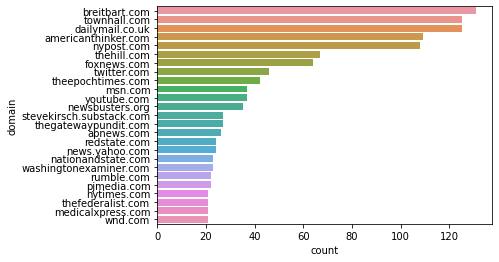

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<AxesSubplot:xlabel='count', ylabel='posted_by'>

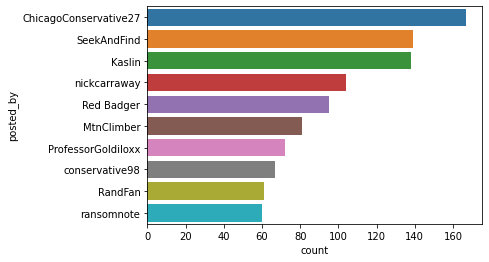

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

domain         \
                                                count unique   
domain                   posted_by                             
americanthinker.com      Kaslin                    36      1   
                         MtnClimber                52      1   
                         SeekAndFind               11      1   
apnews.com               RandFan                    1      1   
breitbart.com            RandFan                    2      1   
                         ChicagoConservative27     79      1   
                         ProfessorGoldiloxx         3      1   
                         Red Badger                 1      1   
                         conservative98             9      1   
dailymail.co.uk          RandFan                    4      1   
                         Red Badger                 1      1   
                         conservative98             3      1   
                         nickcarraway               1      1   
foxnews.com              Kaslin                     1      1   
                         ChicagoConservative27     11      1   
                         ProfessorGoldiloxx         4      1   
                         conservative98            14      1   
                         nickcarraway               1      1   
                         ransomnote                 1      1   
medicalxpress.com        Red Badger                 4      1   
msn.com                  Red Badger                 1      1   
                         nickcarraway               3      1   
nationandstate.com       SeekAndFind                9      1   
news.yahoo.com           SeekAndFind                1      1   
                         RandFan                    1      1   
                         conservative98             1      1   
                         nickcarraway               7      1   
newsbusters.org          ProfessorGoldiloxx         1      1   
                         Red Badger                 1      1   
nypost.com               RandFan                    1      1   
                         ChicagoConservative27     23      1   
                         ProfessorGoldiloxx         1      1   
                         Red Badger                 2      1   
                         conservative98             5      1   
                         nickcarraway              20      1   
pjmedia.com              SeekAndFind                9      1   
                         ProfessorGoldiloxx         3      1   
redstate.com             SeekAndFind               17      1   
                         ProfessorGoldiloxx         1      1   
rumble.com               RandFan                    2      1   
                         conservative98             3      1   
stevekirsch.substack.com ransomnote                25      1   
theepochtimes.com        SeekAndFind               19      1   
                         Red Badger                 1      1   
                         conservative98             1      1   
thefederalist.com        SeekAndFind                4      1   
                         ProfessorGoldiloxx         2      1   
                         Red Badger                 1      1   
                         ransomnote                 2      1   
thegatewaypundit.com     Red Badger                 3      1   
thehill.com              SeekAndFind                1      1   
                         RandFan                    6      1   
                         ChicagoConservative27     46      1   
                         Red Badger                 1      1   
townhall.com             Kaslin                    97      1   
                         SeekAndFind                4      1   
twitter.com              SeekAndFind                1      1   
                         RandFan                   19      1   
                         conservative98             3      1   
                         ransomnote                 2      1   
washingtonexami

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

,timestamp,replies
title,,
